In [ ]:
# Практична робота 2 Винник Михайло ФБ-52мп

## Завдання 1: Зниження розмірності (PCA та t-SNE)
**Дані:** `earthquake_data_tsunami.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 1. Завантаження даних
try:
    df = pd.read_csv('earthquake_data_tsunami.csv')
    df = df.fillna(0) # Проста обробка пропусків
    
    X = df.drop(columns=['tsunami'])
    y = df['tsunami']
    
    # 2. Масштабування
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Розбиття на train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    print("Дані підготовлено. Розмірність:", X_train.shape)

except FileNotFoundError:
    print("Помилка: Файл 'earthquake_data_tsunami.csv' не знайдено.")

Дані підготовлено. Розмірність: (625, 12)


In [ ]:
# Навчання на повних даних
print("1. Навчання Random Forest на всіх ознаках...")
rf_full = RandomForestClassifier(random_state=42)

start_time = time.time()
rf_full.fit(X_train, y_train)
full_time = time.time() - start_time

y_pred_full = rf_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

print(f"   Час: {full_time:.4f} с | Точність: {acc_full:.4f}")

# Зниження розмірності (PCA)
# Залишаємо стільки компонент, щоб зберегти 95% дисперсії (інформації)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

n_components = X_train_pca.shape[1]
print(f"\n2. PCA знизив кількість ознак з {X_train.shape[1]} до {n_components}")

# Навчання на стиснутих даних
print(f"   Навчання Random Forest на {n_components} компонентах...")
rf_pca = RandomForestClassifier(random_state=42)

start_time = time.time()
rf_pca.fit(X_train_pca, y_train)
pca_time = time.time() - start_time

y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"   Час: {pca_time:.4f} с | Точність: {acc_pca:.4f}")

# --- Висновки ---
print("\n=== Порівняння ===")
print(f"Зміна часу: {pca_time - full_time:.4f} с ({(pca_time/full_time)*100:.1f}%)")
print(f"Зміна точності: {acc_pca - acc_full:.4f}")

1. Навчання Random Forest на всіх ознаках...
   Час: 0.2741 с | Точність: 0.9299

2. PCA знизив кількість ознак з 12 до 10
   Навчання Random Forest на 10 компонентах...
   Час: 0.3367 с | Точність: 0.8408

=== Порівняння ===
Зміна часу: 0.0626 с (122.8%)
Зміна точності: -0.0892


Запуск t-SNE (це може зайняти час)...


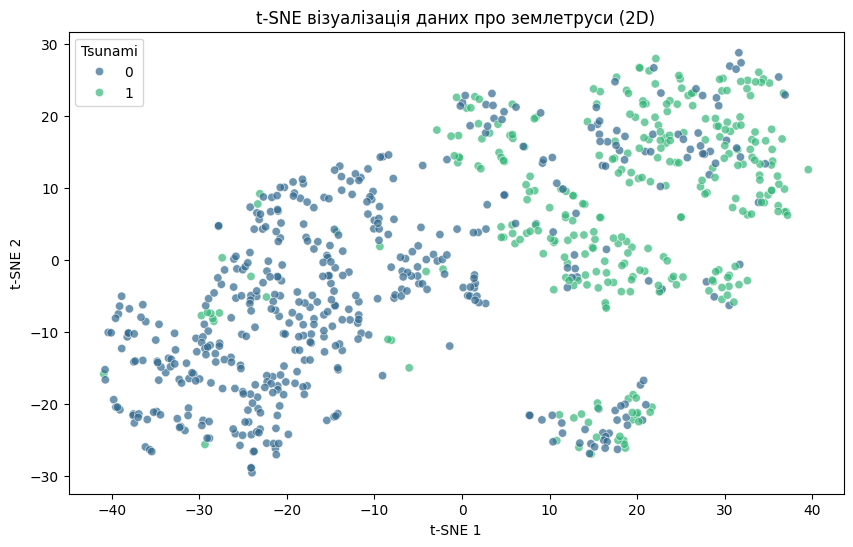

In [4]:
# t-SNE працює повільно на великих даних, тому беремо вибірку (наприклад, 1000 точок)
# Якщо даних мало, беремо всі
sample_size = min(1000, len(X_scaled))
X_sample = X_scaled[:sample_size]
y_sample = y[:sample_size]

print("Запуск t-SNE (це може зайняти час)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_sample)

# Візуалізація
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_sample, palette='viridis', alpha=0.7)
plt.title('t-SNE візуалізація даних про землетруси (2D)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Tsunami')
plt.show()

## Завдання 2: Кластерний аналіз (Квантування кольорів)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
# Наприклад, беремо картинку з папки 'buildings' або 'forest'
image_path = 'intel_images/seg_train/buildings/4.jpg' 

try:
    # Варіант 1: Використовуємо Matplotlib
    if os.path.exists(image_path):
        original_img = plt.imread(image_path)
        print(f"Завантажено файл: {image_path}")

    # Нормалізація (перетворення діапазону 0-255 у 0-1)
    # Деякі функції plt.imread вже повертають 0-1 для png, але для jpg зазвичай 0-255
    if original_img.max() > 1.0:
        original_img = np.array(original_img, dtype=np.float64) / 255.0

    # Отримуємо розміри
    w, h, d = original_img.shape
    print(f"Розмір зображення: {w}x{h}, Каналів: {d}")

    # Перетворення в 2D масив пікселів (список кольорів)
    image_array = np.reshape(original_img, (w * h, d))

    # Функція для відновлення зображення
    def recreate_image(codebook, labels, w, h):
        """Відновлює зображення з центроїдів (нових кольорів)"""
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image

except Exception as e:
    print(f"Виникла помилка: {e}")
    print("Перевірте, чи встановлено бібліотеки: pip install matplotlib scikit-image")

Завантажено файл: intel_images/seg_train/buildings/4.jpg
Розмір зображення: 150x150, Каналів: 3


Обробка для 64 кольорів...
Обробка для 32 кольорів...
Обробка для 16 кольорів...
Обробка для 8 кольорів...


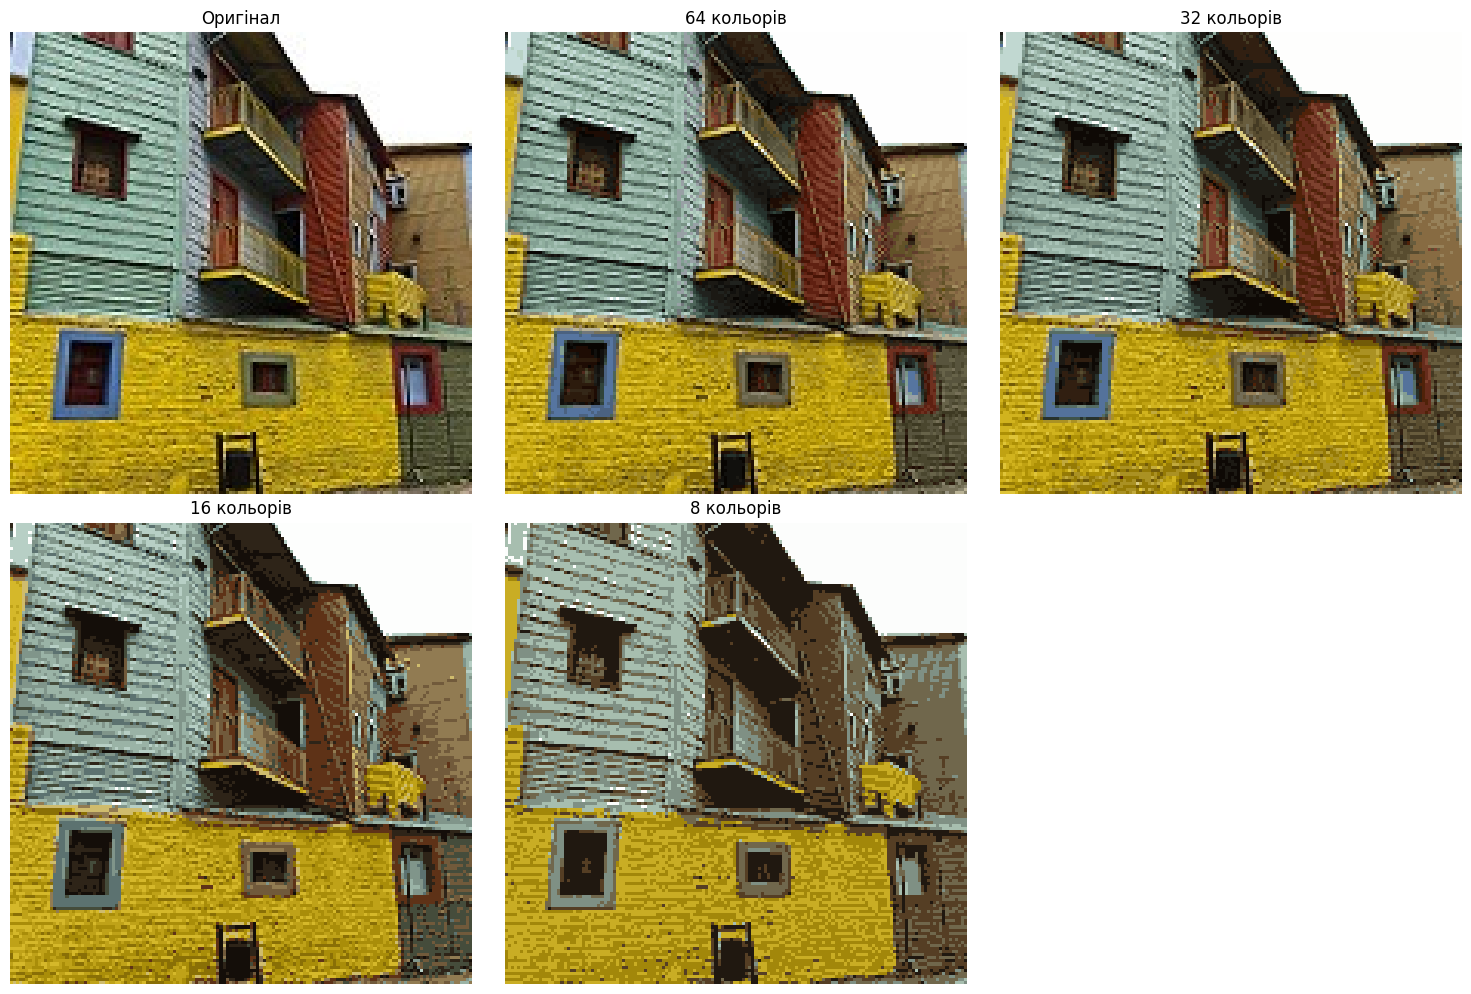

In [ ]:
# Кількість кольорів для тестування
n_colors_list = [64, 32, 16, 8]

plt.figure(figsize=(15, 10))

# Оригінал
plt.subplot(2, 3, 1)
plt.axis('off')
plt.title('Оригінал')
plt.imshow(original_img)

# Цикл по кількості кольорів
plot_idx = 2
for n_colors in n_colors_list:
    print(f"Обробка для {n_colors} кольорів...")
    
    # Навчання K-Means
    # n_init='auto' пришвидшує роботу
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init='auto').fit(image_array)
    
    # Заміна кольорів на центри кластерів
    quantized_img = recreate_image(kmeans.cluster_centers_, kmeans.labels_, w, h)
    
    plt.subplot(2, 3, plot_idx)
    plt.axis('off')
    plt.title(f'{n_colors} кольорів')
    plt.imshow(quantized_img)
    plot_idx += 1

plt.tight_layout()
plt.show()

## Завдання 3: Класифікація текстових даних

Читання файлу test/test.txt...
Успішно завантажено 15000 відгуків.
Очистка тексту...


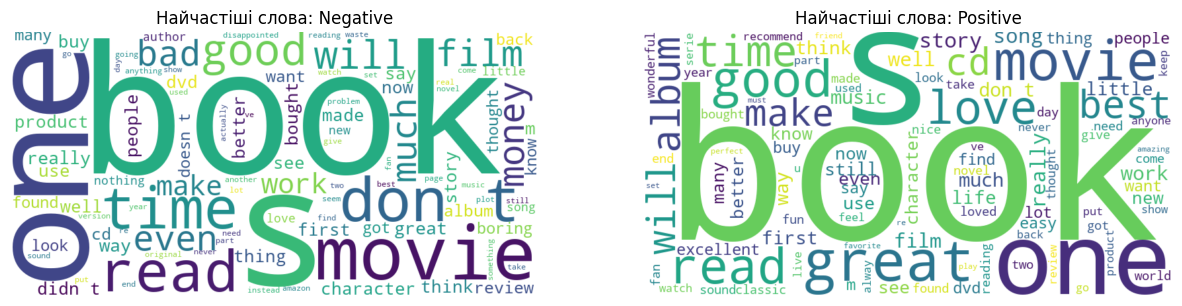

In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Налаштування
file_path = 'test/test.txt'
num_records = 15000  # Беремо лише 15 тисяч рядків, бо файл дуже великий

print(f"Читання файлу {file_path}...")

def get_labels_and_texts(file, n_lines):
    labels = []
    texts = []
    try:
        with open(file, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                if i >= n_lines:
                    break
                
                try:
                    # перевірка на короткі або пусті рядки
                    if len(line) > 10:
                        label_part = int(line[9]) - 1
                        text_part = line[10:].strip()
                        labels.append(label_part)
                        texts.append(text_part)
                except ValueError:
                    continue # пропускаю биті рядки

    except FileNotFoundError:
        print(f"ПОМИЛКА: Файл '{file}' не знайдено!")
        return [], []
    except Exception as e:
        print(f"Інша помилка: {e}")
        return [], []
        
    return labels, texts

y_data, X_text = get_labels_and_texts(file_path, num_records)

# перевірка, чи завантажилось
if len(X_text) > 0:
    print(f"Успішно завантажено {len(X_text)} відгуків.")
    
    # створюємо DataFrame для зручності
    df_amazon = pd.DataFrame({'text': X_text, 'label': y_data})
    
    # 0 = Negative, 1 = Positive
    target_names = ['Negative', 'Positive']

    # очистка тексту
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'\W', ' ', text) # прибираю пунктуацію
        text = re.sub(r'\s+', ' ', text)
        return text

    print("Очистка тексту...")
    df_amazon['clean_text'] = df_amazon['text'].apply(clean_text)

    # WordCloud
    plt.figure(figsize=(15, 6))
    for i, label_name in enumerate(target_names):
        # Збираємо текст для конкретного класу
        subset = df_amazon[df_amazon['label'] == i]['clean_text']
        text_cat = " ".join(subset.values)
        
        # Генеруємо хмару слів
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_cat)
        
        plt.subplot(1, 2, i+1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Найчастіші слова: {label_name}")
    plt.show()

else:
    print("Немає даних для обробки. Перевірте шлях до файлу.")

In [15]:
if len(X_text) > 0:
    # 1. Розбиття на train/test (бо ми читали з одного файлу)
    X_train_txt, X_test_txt, y_train, y_test = train_test_split(
        df_amazon['clean_text'], 
        df_amazon['label'], 
        test_size=0.2, 
        random_state=42
    )

    # 2. Векторизація
    print("Векторизація текстів...")
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train_txt)
    X_test_vec = vectorizer.transform(X_test_txt)

    # 3. Навчання
    print("Навчання моделі...")
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)

    # 4. Оцінка
    y_pred = clf.predict(X_test_vec)
    print("\nРезультати класифікації Amazon Reviews:")
    print(classification_report(y_test, y_pred, target_names=target_names))

Векторизація текстів...
Навчання моделі...

Результати класифікації Amazon Reviews:
              precision    recall  f1-score   support

    Negative       0.85      0.82      0.84      1459
    Positive       0.84      0.86      0.85      1541

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

